In [5]:
from sklearn.datasets import load_boston
boston = load_boston()

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
# 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.
print(f'  Data shape = {boston.data.shape}')
print(f'Target shape = {boston.target.shape}')

  Data shape = (506, 13)
Target shape = (506,)


In [8]:
print(boston.target[1:15]) #Target = Median value of owner-occupied homes in $1000's

[21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4 18.2]


In [9]:
# get the features' names
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### Load data into a dataframe and explore

In [12]:
import pandas as pd

boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MedHouseValue'] = pd.Series(boston.target)

max(boston_df['MedHouseValue'])

50.0

In [33]:
for col in boston_df.columns: 
    print(col) 

CRIM
ZN
INDUS
CHAS
NOX
RM
AGE
DIS
RAD
TAX
PTRATIO
B
LSTAT
MedHouseValue


### Explore

In [13]:
pd.set_option('precision', 4)
pd.set_option('max_columns', 9)
pd.set_option('display.width', None)

In [14]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,...,PTRATIO,B,LSTAT,MedHouseValue
count,506.0000,506.0000,506.0000,506.0000,...,506.0000,506.0000,506.0000,506.0000
mean,3.6135,11.3636,11.1368,0.0692,...,18.4555,356.6740,12.6531,22.5328
std,8.6015,23.3225,6.8604,0.2540,...,2.1649,91.2949,7.1411,9.1971
min,0.0063,0.0000,0.4600,0.0000,...,12.6000,0.3200,1.7300,5.0000
25%,0.0820,0.0000,5.1900,0.0000,...,17.4000,375.3775,6.9500,17.0250
50%,0.2565,0.0000,9.6900,0.0000,...,19.0500,391.4400,11.3600,21.2000
75%,3.6771,12.5000,18.1000,0.0000,...,20.2000,396.2250,16.9550,25.0000
max,88.9762,100.0000,27.7400,1.0000,...,22.0000,396.9000,37.9700,50.0000


In [15]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,...,PTRATIO,B,LSTAT,MedHouseValue
0,0.0063,18.0,2.31,0.0,...,15.3,396.90,4.98,24.0
1,0.0273,0.0,7.07,0.0,...,17.8,396.90,9.14,21.6
2,0.0273,0.0,7.07,0.0,...,17.8,392.83,4.03,34.7
3,0.0324,0.0,2.18,0.0,...,18.7,394.63,2.94,33.4
4,0.0691,0.0,2.18,0.0,...,18.7,396.90,5.33,36.2


### Random sampling ( 50% because the dataset is small)

In [16]:
sample_df = boston_df.sample(frac=0.5, random_state=17)

### Data visualizations

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2)
sns.set_style('whitegrid')

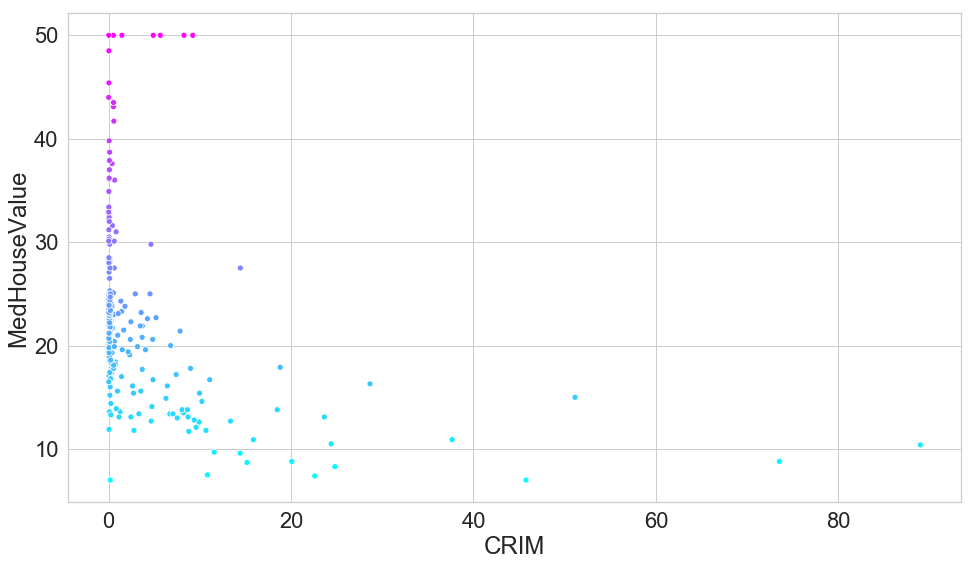

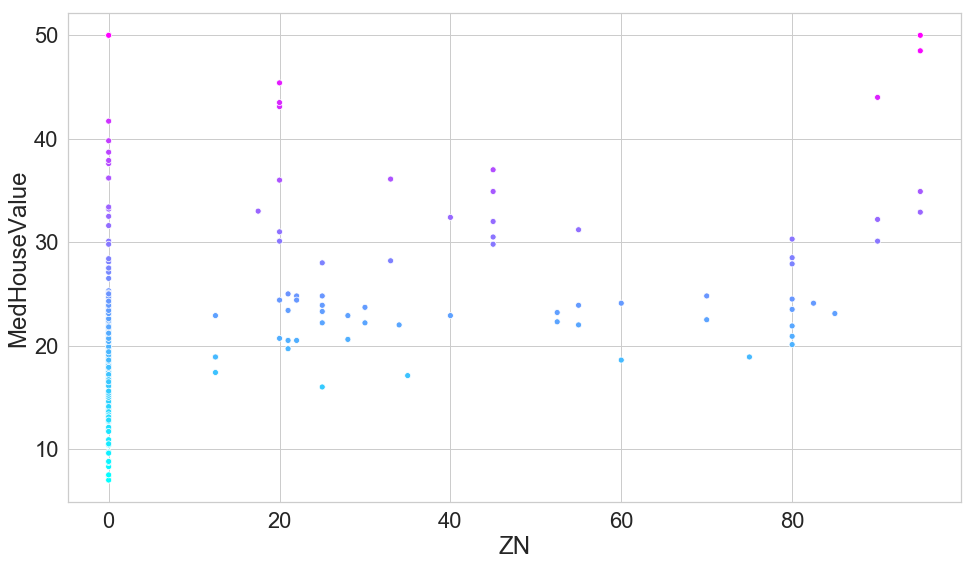

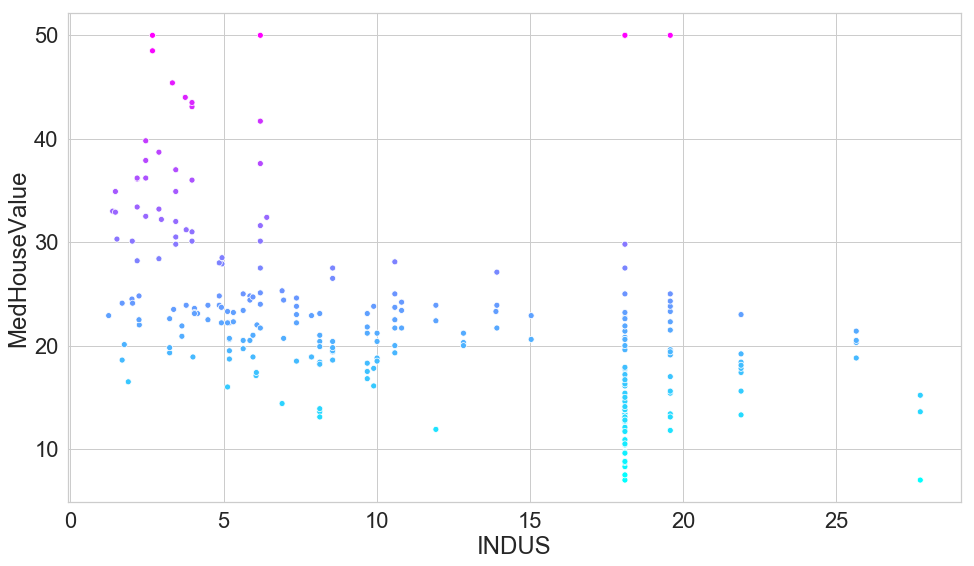

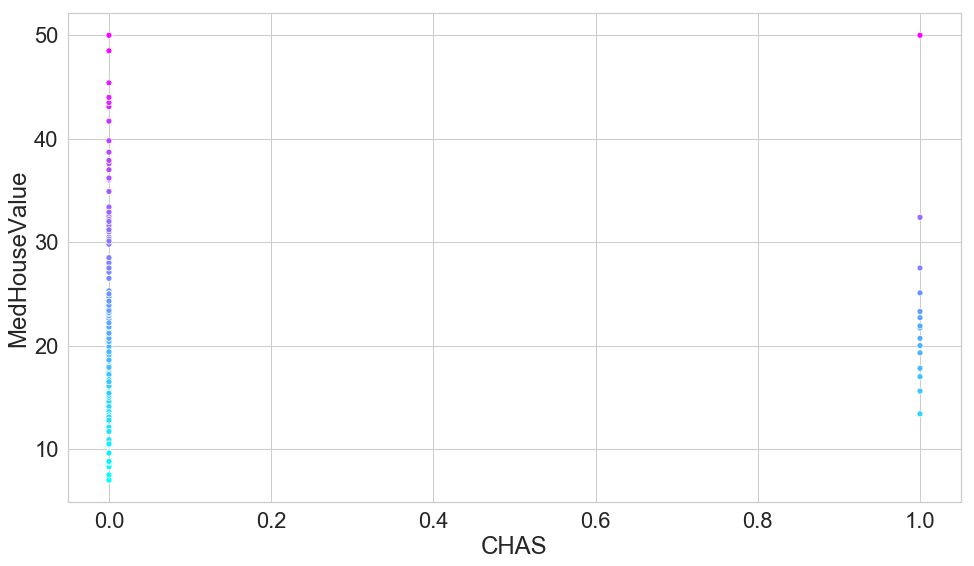

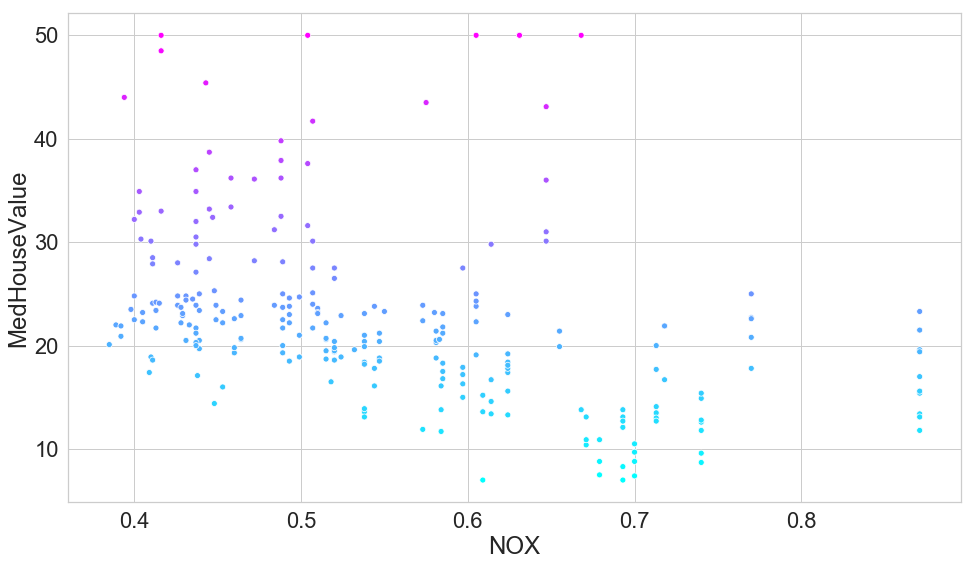

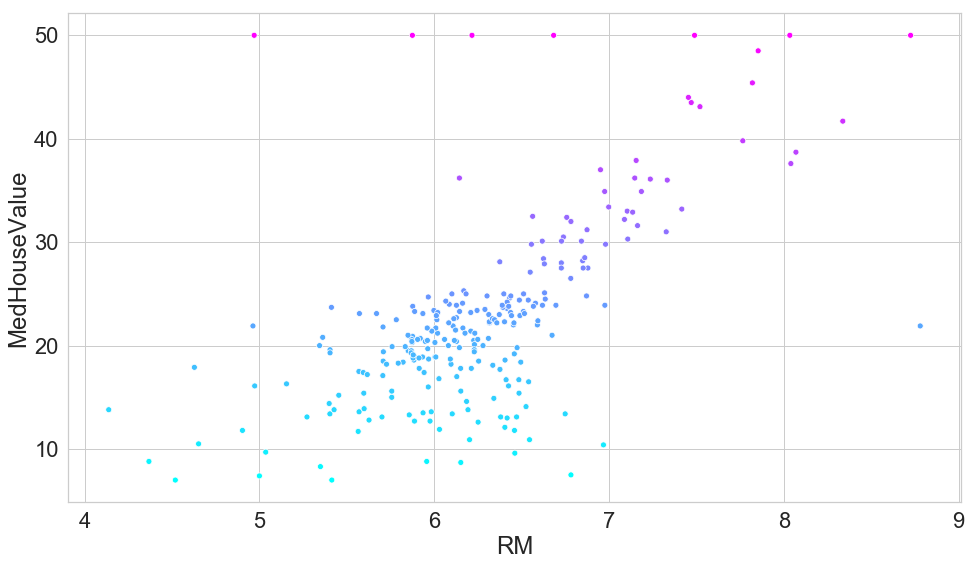

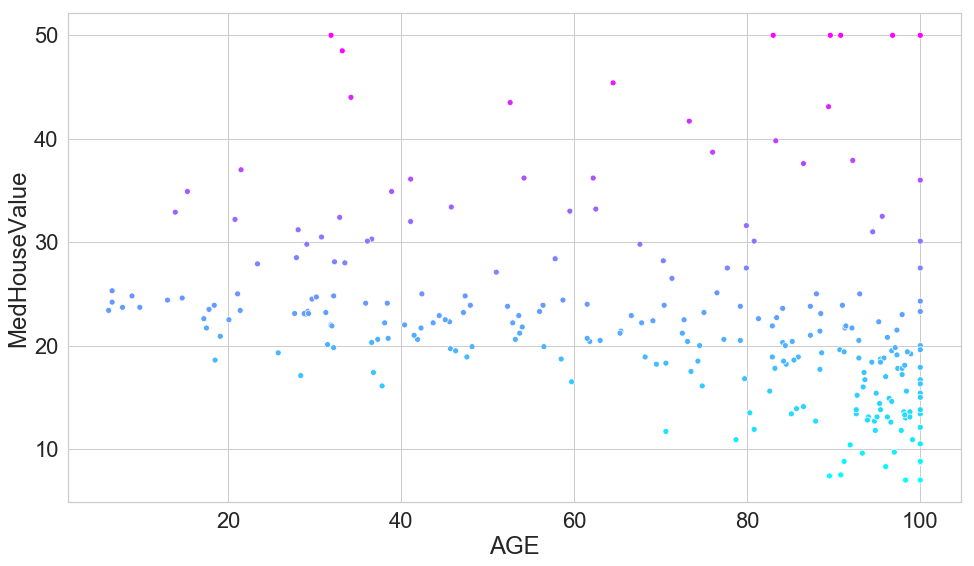

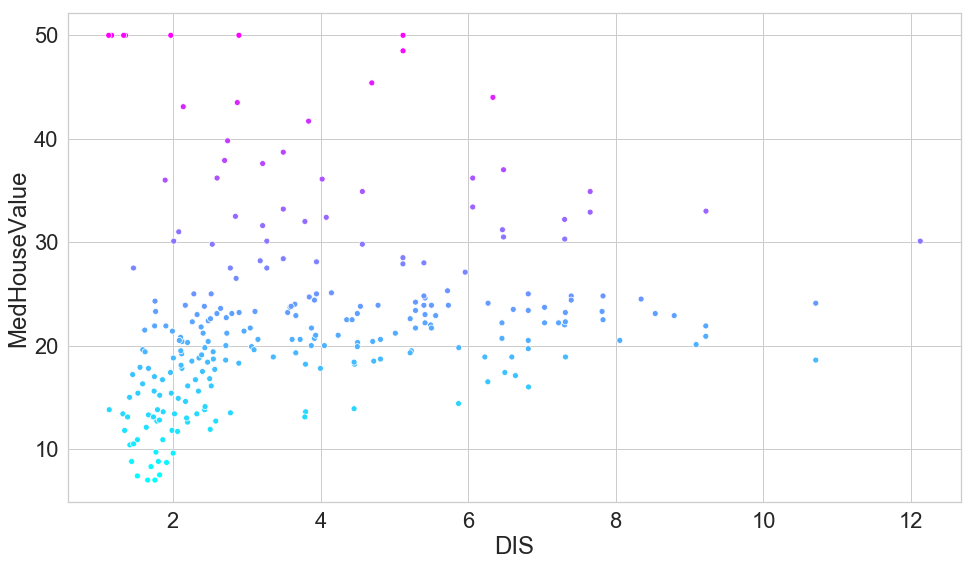

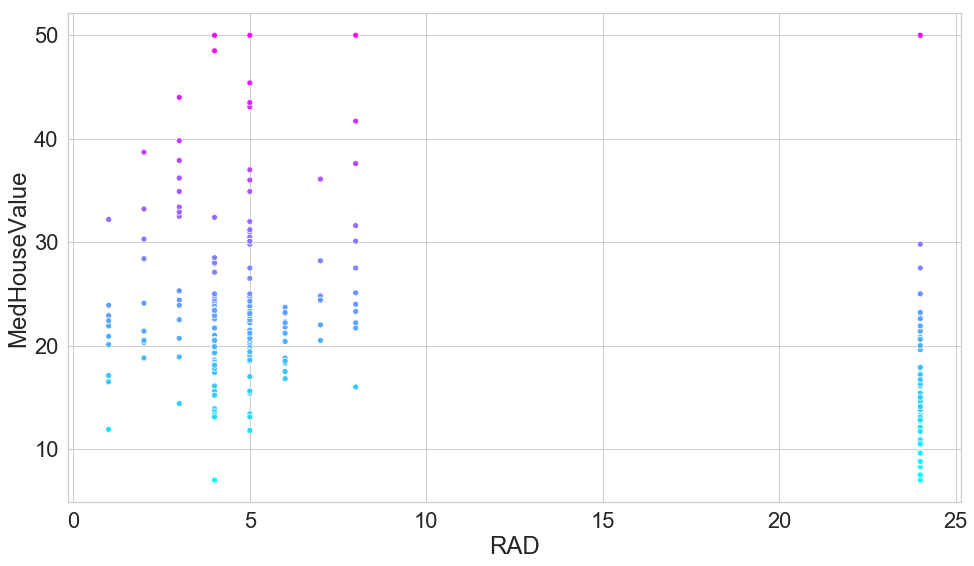

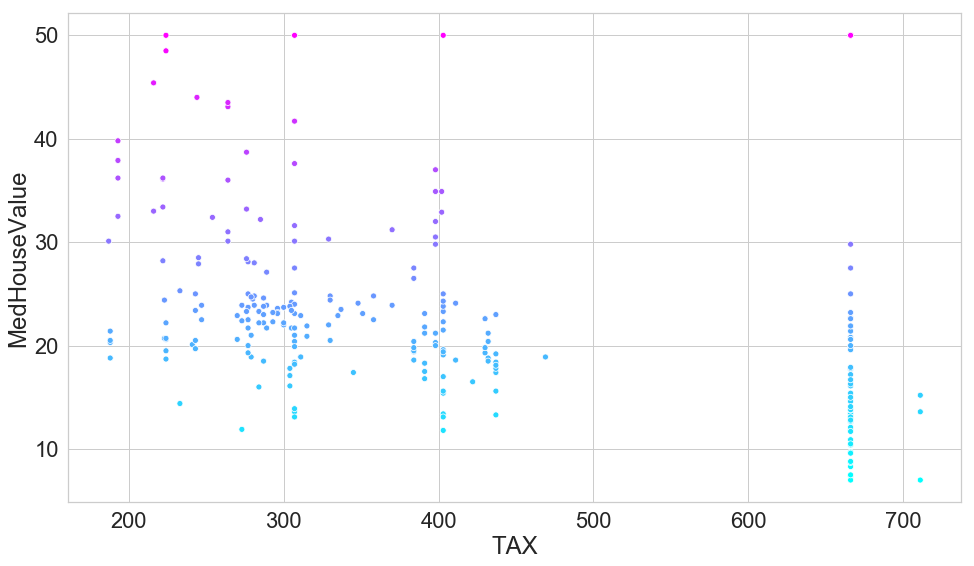

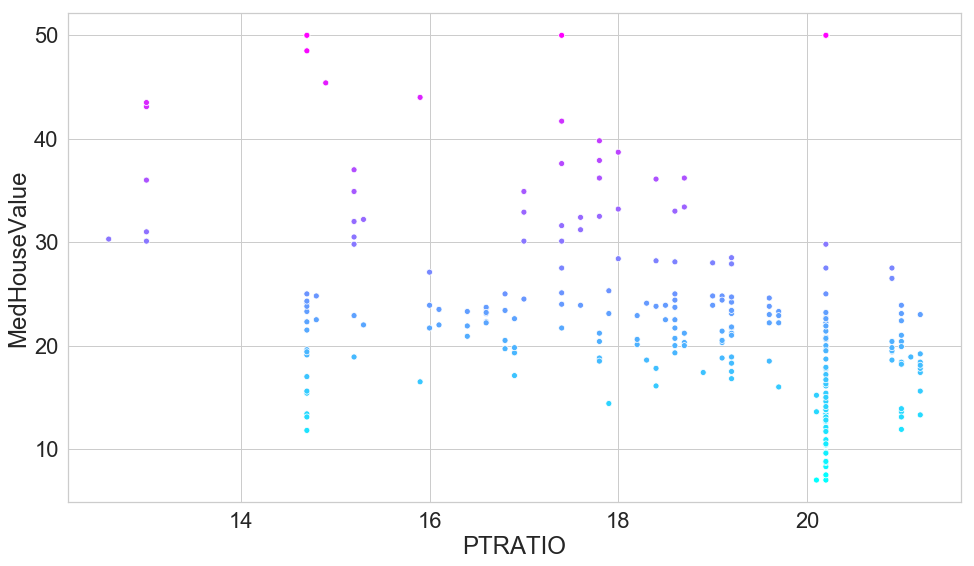

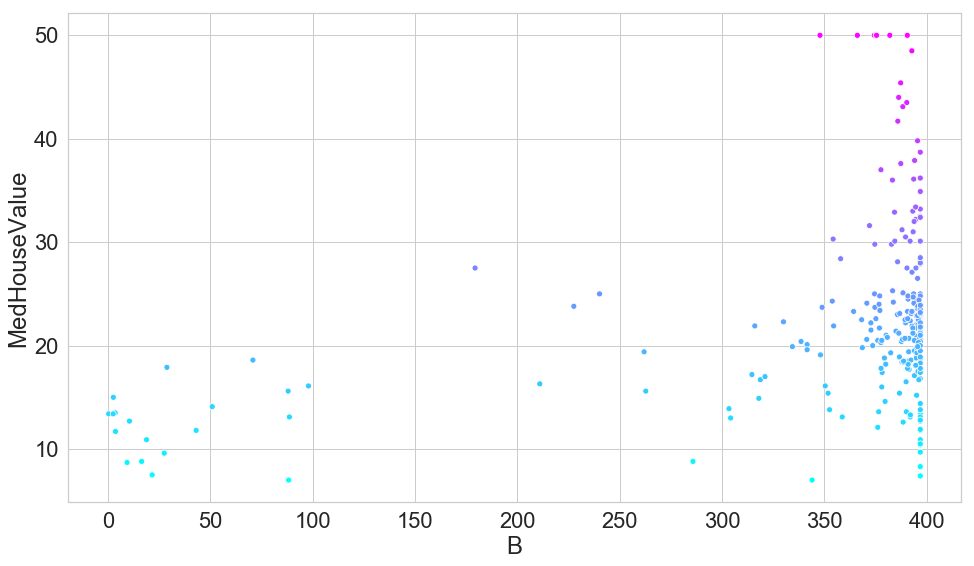

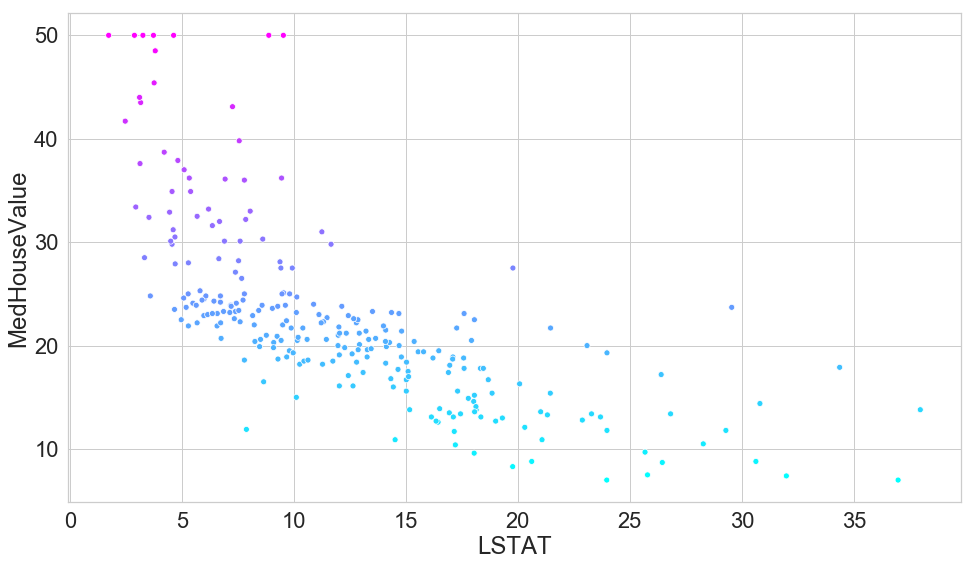

In [18]:
for feature in boston.feature_names:
     plt.figure(figsize=(16, 9))
     sns.scatterplot(data=sample_df, x=feature, y='MedHouseValue', 
                     hue='MedHouseValue', 
                     palette='cool', legend= False)

### Split the data for training and testing

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(boston.data, boston.target, random_state=11)

print(f'Shape of training set = {X_train.shape}')
print(f'Shape of testing  set = {X_test.shape}')

Shape of training set = (379, 13)
Shape of testing  set = (127, 13)


### Train the model

In [20]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

small_factors_two_percent =[]
small_factors_index=[]
big_factors_index = []

for i, name in enumerate(boston.feature_names):
    print(f'{name:>11}: {linear_regression.coef_[i]:24.15f}')
    
print(f'y-intercept: {linear_regression.intercept_:23.15f}')

for i, name in enumerate(boston.feature_names):
    if abs(linear_regression.coef_[i])<0.02:
        print(f' factor {i} {name:>11} is small than 2%: {linear_regression.coef_[i]:24.15f}')
        small_factors_two_percent.append(linear_regression.coef_[i])
        small_factors_index.append(i)
    else:
        big_factors_index.append(i)


       CRIM:       -0.096889827581053
         ZN:        0.048689753567464
      INDUS:        0.022920925360373
       CHAS:        2.933320887157498
        NOX:      -18.630355255113962
         RM:        4.399797589818117
        AGE:        0.011654478970856
        DIS:       -1.392173565004815
        RAD:        0.316242843741186
        TAX:       -0.013328903299486
    PTRATIO:       -0.876135262876206
          B:        0.011239848501602
      LSTAT:       -0.489006674755915
y-intercept:      29.961714795504793
 factor 6         AGE is small than 2%:        0.011654478970856
 factor 9         TAX is small than 2%:       -0.013328903299486
 factor 11           B is small than 2%:        0.011239848501602


### Test the model

In [21]:
import math
from sklearn import metrics

predicted = linear_regression.predict(X_test)
expected  = y_test

r2 = metrics.r2_score(expected, predicted)
r  = math.sqrt(r2)

print(f'coefficient of determination = {r2:.2f}')
print(f'     correlation coefficient = {r:.2f}')
if abs(r)>=0.8:
    print('Strong Relationship')

coefficient of determination = 0.68
     correlation coefficient = 0.83
Strong Relationship


### Visualize the expected vs. predicted prices

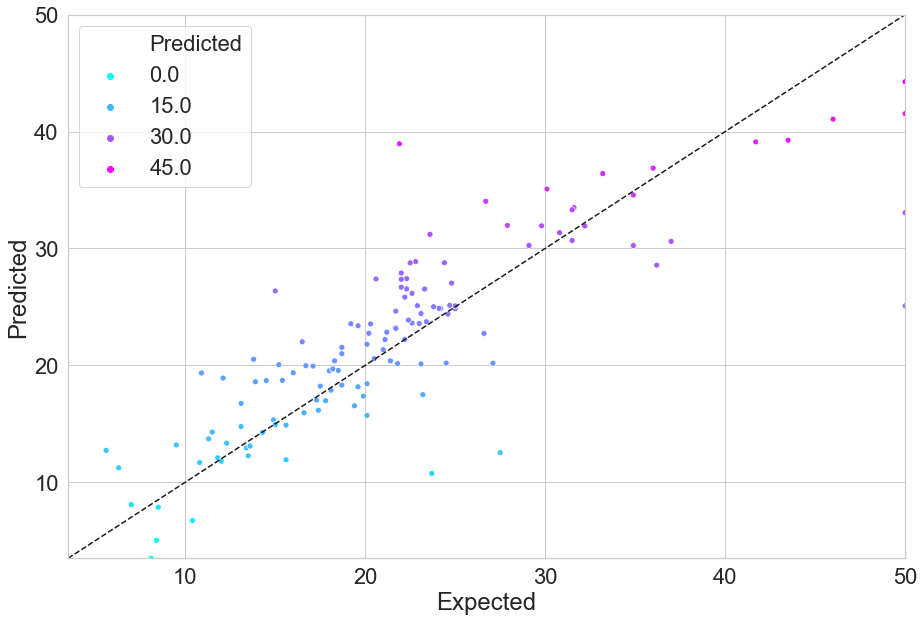

In [22]:
df = pd.DataFrame()

df['Expected']  = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(15, 10))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
                       hue='Predicted', palette='cool', 
                       legend='brief')

start = min(expected.min(), predicted.min())
end   = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

### Test the model with removal of 3 factors

In [23]:
import math
from sklearn import metrics
import numpy as np
from sklearn.linear_model import LinearRegression

# transfer the test and train data to numpy array data type
X_test_np = np.array(X_test)
X_train_np = np.array(X_train)
Y_train_np = np.array(y_train)

# remove the small factors data
X_test_removal = np.delete(X_test_np,small_factors_index,1)
X_train_removal = np.delete(X_train_np,small_factors_index,1)

linear_regression = LinearRegression()
linear_regression.fit(X=X_train_removal, y=Y_train_np)


predicted_removal = linear_regression.predict(X_test_removal)
expected_removal  = y_test

r2_removal = metrics.r2_score(expected_removal, predicted_removal)
r_removal  = math.sqrt(r2_removal)

print(f'coefficient of determination = {r2_removal:.2f}')
print(f'     correlation coefficient = {r_removal:.2f}')
if abs(r_removal)>=0.8:
    print('Strong Relationship')

coefficient of determination = 0.69
     correlation coefficient = 0.83
Strong Relationship


### Visualize the expected vs. predicted prices  after removal of 3 factors

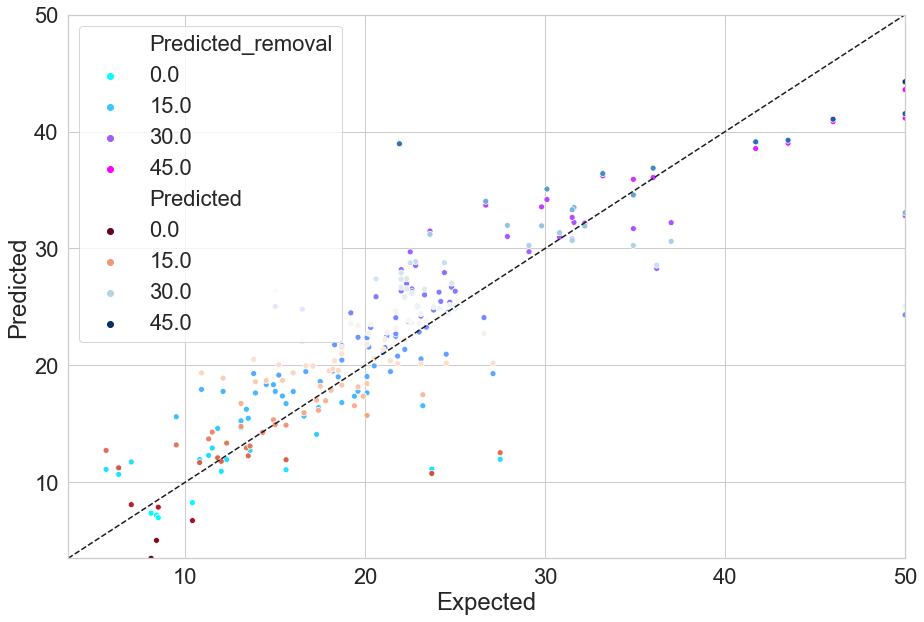

In [24]:
df_removal = pd.DataFrame()

df_removal['Expected']  = pd.Series(expected_removal)
df_removal['Predicted_removal'] = pd.Series(predicted_removal)

figure = plt.figure(figsize=(15, 10))

axes = sns.scatterplot(data=df_removal, x='Expected', y='Predicted_removal', 
                       hue='Predicted_removal', palette='cool', 
                       legend='brief')

start = min(expected.min(), predicted.min())
end   = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
                       hue='Predicted', palette='RdBu', 
                       legend='brief')



### Analyze price information

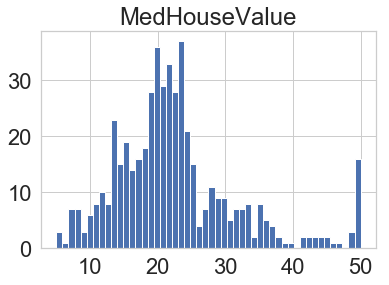

In [27]:
histogram = boston_df.hist('MedHouseValue',bins=50) 

In [ ]:
### Print the most important factors room number vs. nitric oxides concentration

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


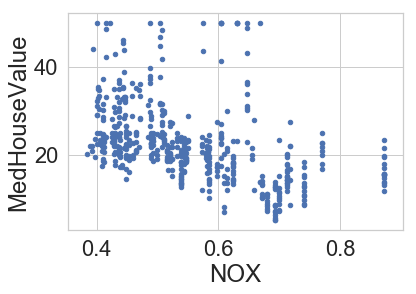

In [34]:
boston_df.plot(kind='scatter',x ='NOX',y='MedHouseValue')

In [ ]:
### Print the most important factors room number vs. price

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


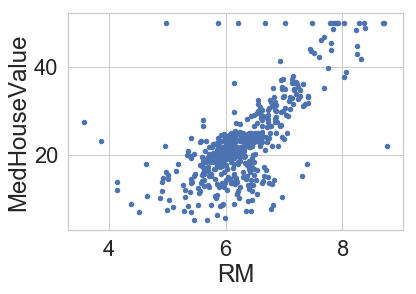

In [35]:
boston_df.plot(kind='scatter',x ='RM',y='MedHouseValue')